In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("different stores data.csv")
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


### 1. Check missing values and duplicate records

In [5]:
df.isnull()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

### 2. Add column name 'Total Sales'

In [9]:
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


In [10]:
df['Total Sales'] = df['quantity'] * df['selling_price_per_unit']
print(df)

      invoice_no      invoice_date customer_id  gender  age         category  \
0        I138884   10/30/2016 9:58     C241288  Female   28         Clothing   
1        I317333   10/30/2016 9:58     C111565    Male   21            Shoes   
2        I127801   10/30/2016 9:58     C266599    Male   20         Clothing   
3        I173702   10/30/2016 9:58     C988172  Female   66            Shoes   
4        I337046   10/30/2016 9:59     C189076  Female   53            Books   
...          ...               ...         ...     ...  ...              ...   
99452    I219422  11/15/2016 12:43     C441542  Female   45         Souvenir   
99453    I325143  11/15/2016 12:43     C569580    Male   27  Food & Beverage   
99454    I824010  11/15/2016 12:44     C103292    Male   63  Food & Beverage   
99455    I702964  11/15/2016 12:44     C800631    Male   56       Technology   
99456    I232867  11/15/2016 12:44     C273973  Female   36         Souvenir   

       quantity  selling_price_per_unit

In [11]:
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00


### 3. How many customers have age more than 60?

In [13]:
df.age.value_counts()

age
37    2057
22    2051
64    2002
43    2000
51    1993
30    1981
24    1977
40    1960
48    1955
36    1954
38    1954
28    1953
27    1950
39    1947
21    1947
61    1945
52    1945
19    1936
56    1916
33    1913
46    1911
62    1909
44    1904
53    1903
67    1901
69    1901
23    1897
26    1896
68    1893
42    1892
41    1892
32    1891
63    1886
29    1885
49    1883
34    1883
47    1880
57    1879
66    1876
45    1876
58    1875
59    1874
60    1874
50    1873
31    1866
25    1863
65    1856
18    1844
20    1844
55    1843
35    1841
54    1830
Name: count, dtype: int64

In [14]:
customers_over_60 = (df['age'] > 60).sum()

print(f"The number of customers with age more than 60 is: {customers_over_60}")

The number of customers with age more than 60 is: 17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [16]:
df['customer_id'].nunique()

99457

In [17]:
df.shape[0]

99457

In [18]:
customers_with_multiple_purchases = df.groupby('customer_id').size()[df.groupby('customer_id').size() > 1]

if len(customers_with_multiple_purchases) > 0:
    print(f"{len(customers_with_multiple_purchases)}")
else:
    print("None")

None


### 5. Are there more male or female customers, Show in Pie Chart?

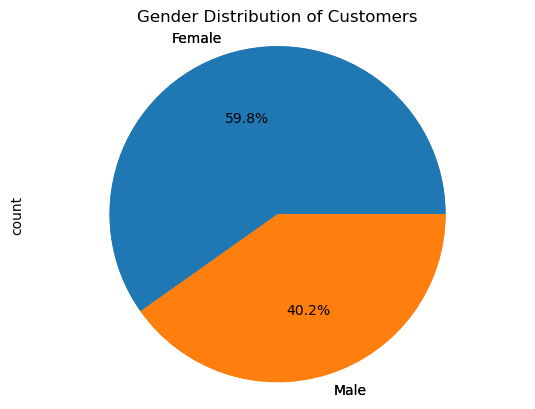

In [72]:
df['gender'].value_counts()
df.gender.value_counts().plot(kind='pie')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.show()

### 6. Which category is least popular among customers?

In [21]:
category_counts = df['category'].value_counts()
category_counts

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [23]:
category_counts.idxmin()

'Books'

### 7. Which category has the highest sales volume?

In [25]:
sales_by_category = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
highest_sales_category = sales_by_category.index[0]
print(f'{highest_sales_category}')

Clothing


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [ ]:
df = pd.read_csv("different stores data.csv", header=0)
df = df.assign(Total_Profit=empty_col[0])
df

In [27]:
df['Total cost'] = df['quantity'] * df['cost_price_per_unit']
print(df)

      invoice_no      invoice_date customer_id  gender  age         category  \
0        I138884   10/30/2016 9:58     C241288  Female   28         Clothing   
1        I317333   10/30/2016 9:58     C111565    Male   21            Shoes   
2        I127801   10/30/2016 9:58     C266599    Male   20         Clothing   
3        I173702   10/30/2016 9:58     C988172  Female   66            Shoes   
4        I337046   10/30/2016 9:59     C189076  Female   53            Books   
...          ...               ...         ...     ...  ...              ...   
99452    I219422  11/15/2016 12:43     C441542  Female   45         Souvenir   
99453    I325143  11/15/2016 12:43     C569580    Male   27  Food & Beverage   
99454    I824010  11/15/2016 12:44     C103292    Male   63  Food & Beverage   
99455    I702964  11/15/2016 12:44     C800631    Male   56       Technology   
99456    I232867  11/15/2016 12:44     C273973  Female   36         Souvenir   

       quantity  selling_price_per_unit

In [31]:
df['Total Profit'] = df['Total Sales'] - df['Total cost']
print(df)

      invoice_no      invoice_date customer_id  gender  age         category  \
0        I138884   10/30/2016 9:58     C241288  Female   28         Clothing   
1        I317333   10/30/2016 9:58     C111565    Male   21            Shoes   
2        I127801   10/30/2016 9:58     C266599    Male   20         Clothing   
3        I173702   10/30/2016 9:58     C988172  Female   66            Shoes   
4        I337046   10/30/2016 9:59     C189076  Female   53            Books   
...          ...               ...         ...     ...  ...              ...   
99452    I219422  11/15/2016 12:43     C441542  Female   45         Souvenir   
99453    I325143  11/15/2016 12:43     C569580    Male   27  Food & Beverage   
99454    I824010  11/15/2016 12:44     C103292    Male   63  Food & Beverage   
99455    I702964  11/15/2016 12:44     C800631    Male   56       Technology   
99456    I232867  11/15/2016 12:44     C273973  Female   36         Souvenir   

       quantity  selling_price_per_unit

### 9. Display the top 10 invoices with the highest quantities sold?

In [33]:
 df.sort_values('quantity', ascending=False).head(10)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total cost,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,40162.500,7087.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,923.088,52.752
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,1561.344,390.336
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,3135.660,165.220
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,6751.800,2250.600
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,3000.80,2250.600,750.200
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,3000.80,2920.600,80.200
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,1097.82,1066.365,31.455
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,650.56,455.392,195.168
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,121.20,120.840,0.360


### 10. Which payment method is most commonly used?

In [35]:
payment_method_counts = df['payment_method'].value_counts()
payment_method_counts

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [37]:
payment_method_counts.idxmax()

'Cash'

### 11. Total Sales with respect to region?

In [40]:
df.groupby('region')['Total Sales'].sum()

region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [46]:
df.groupby('shopping_mall')['Total Sales'].mean().sort_values(ascending=False)

shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

In [52]:
df['profit_margin'] = ((df['Total Sales'] / df['Total cost']) * 100)
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total cost,Total Profit,profit_margin
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,7126.9000,375.1000,105.263158
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,4861.3770,540.1530,111.111111
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,295.0600,5.0200,101.701349
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,14503.8250,500.4250,103.450297
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,181.8000,60.6000,133.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,219.9375,73.3125,133.333333
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,14.6440,6.2760,142.857143
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,14.6440,6.2760,142.857143
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,15120.0000,1680.0000,111.111111


In [60]:
profit_margin_by_category = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
profit_margin_by_category

category
Souvenir           139.201034
Food & Beverage    139.066415
Books              139.041163
Cosmetics          133.735447
Toys               133.724363
Clothing           122.104394
Shoes              114.237260
Technology         112.431121
Name: profit_margin, dtype: float64

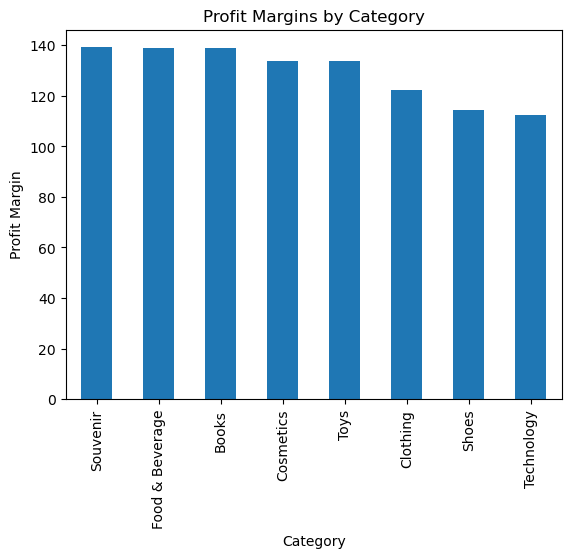

In [74]:
profit_margin_by_category.plot(kind='bar')
figsize=(10,5)
plt.title('Profit Margins by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=90)
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [88]:
df.groupby(['region', 'payment_method'])['invoice_no'].sum()

region   payment_method
Central  Cash              I412481I106674I473411I246550I246562I202367I221...
         Credit Card       I336189I688768I823067I167211I339732I147062I187...
         Debit Card        I294687I304265I739573I317105I215721I154469I869...
East     Cash              I252275I217053I655874I160777I148377I258195I263...
         Credit Card       I209744I331891I768348I300213I133061I297270I740...
         Debit Card        I161949I109053I205366I269690I137794I207205I278...
South    Cash              I337046I826174I292239I260525I306076I227716I215...
         Credit Card       I138884I173702I883721I309552I340014I224371I320...
         Debit Card        I317333I640508I276526I148276I783231I313426I402...
West     Cash              I127801I121056I306368I179802I993048I992454I174...
         Credit Card       I227836I293112I293455I326945I139207I195744I183...
         Debit Card        I195396I218590I204979I195567I722319I172458I202...
Name: invoice_no, dtype: object

### 15. How do sales in different categories compare between males and females?

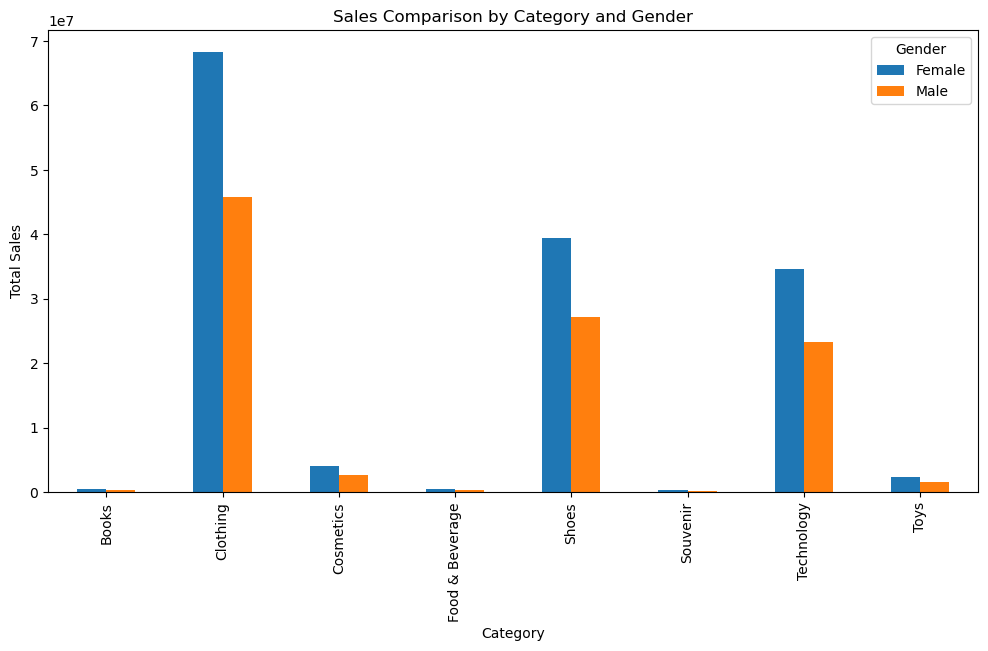

In [92]:
sales_by_gender_and_category = df.groupby(['category', 'gender'])['Total Sales'].sum().unstack(fill_value=0)

sales_by_gender_and_category.plot(kind='bar', figsize=(12, 6))
plt.title('Sales Comparison by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()